<a href="https://colab.research.google.com/github/Blessednv/NYU-Fall-22-DataScience-BootCamp/blob/main/Copy_of_Week4_DataVisualization_%26_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### We start by importing the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the Data

In [5]:
rentals = pd.read_csv("streeteasy.csv")

### View few of its entries

In [6]:
rentals.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


## **Univariate analysis**
Univariate analysis focuses on a single variable at a time. Univariate data visualizations can help us answer questions like:

* What is the typical price of a rental in New York City?
* What proportion of NYC rentals have a gym?

Depending on the type of variable (quantitative or categorical) we want to visualize, we need to use slightly different visualizations.

## **Quantitative variables** - 

Box plots (or violin plots) and histograms are common choices for visually summarizing a quantitative variable. These plots are useful because they simultaneously communicate information about minimum and maximum values, central location, and spread. Histograms can additionally illuminate patterns that can impact an analysis (eg., skew or multimodality).

For example, suppose we are interested in learning more about the price of apartments in NYC. A good starting place is to plot a box plot of the rent variable. We could plot a boxplot of rent as follows:

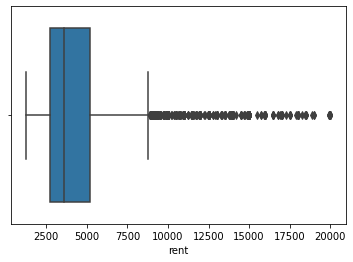

In [7]:
sns.boxplot(x='rent', data=rentals)
plt.show()

Observation: We can see that most rental prices fall within a range of 2500 - 5000, however, there are many outliers, particularly on the high end. For more detail, we can also plot a histogram of the rent variable.

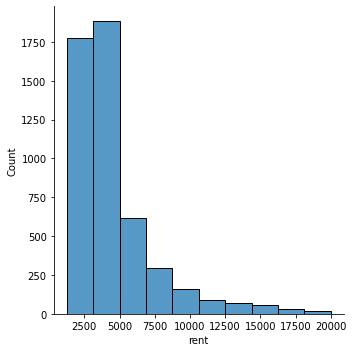

In [8]:
# Create a histogram of the rent variable
sns.displot(rentals.rent, bins=10, kde=False)
plt.show()

The histogram highlights the long right-handed tail for rental prices. We can get a more detailed look at this distribution by increasing the number of bin

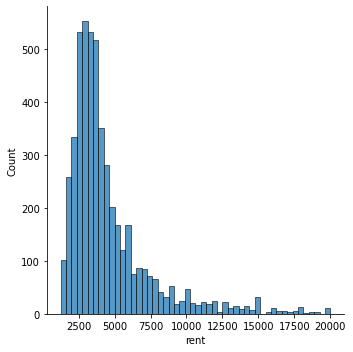

In [9]:
# Create a histogram of the rent variable
sns.displot(rentals.rent, bins=50, kde=False)
plt.show()

### **Categorical variables**

For categorical variables, we can use a bar plot (instead of a histogram) to quickly visualize the frequency (or proportion) of values in each category. For example, suppose we want to know how many apartments are available in each borough. We can visually represent that information as follows:

### Bar Plot

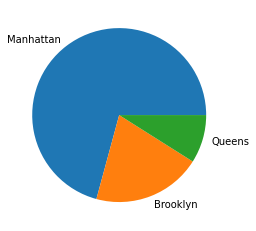

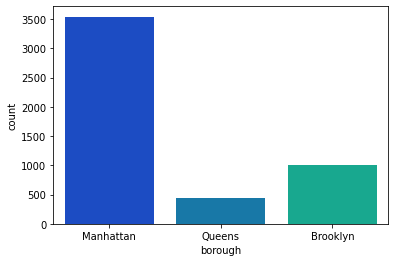

In [10]:
# Define the labels in pie chart
borough_labels = ["Manhattan", "Brooklyn", "Queens"]

# Generate pie chart of boroughs
plt.pie(rentals.borough.value_counts(), labels = borough_labels)
plt.show()# Create a barplot of the counts in the borough variable
# The palette parameter will set the color scheme for the plot

sns.countplot(x='borough', data=rentals, palette='winter')
plt.show()

### OR use a Pie-Chart

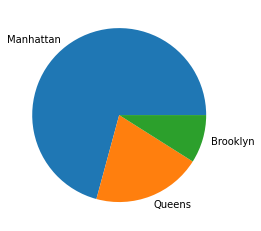

In [11]:
borough_labels = rentals.borough.unique()

# Generate pie chart of boroughs
plt.pie(rentals.borough.value_counts(), labels = borough_labels)
plt.show()

## **Bivariate analysis**

In many cases, a data analyst is interested in the relationship between two variables in a dataset. For example:

* Do apartments in different boroughs tend to cost different amounts?
* What is the relationship between the area of an apartment and how much it costs?

Depending on the types of variables we are interested in, we need to rely on different kinds of visualizations and can have combination as follows-


1.   2 Categorical Variables
2.   2 Quantitative Variables
3.   1 Quantitiative & 1 Categorical Variable



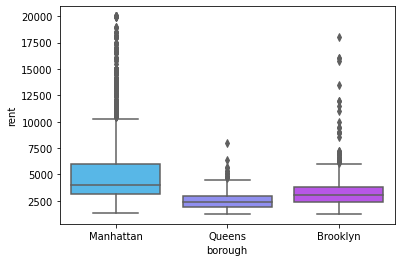

In [12]:
### For example we have rent as a quantitative values znd borough as categorical values

sns.boxplot(x='borough', y='rent', data=rentals, palette='cool')
plt.show()

This plot indicates that rental prices in Manhattan tend to be higher and have more variation than rental prices in other boroughs. We could also investigate the same question in more detail by looking at overlapping histograms of rental prices by borough:

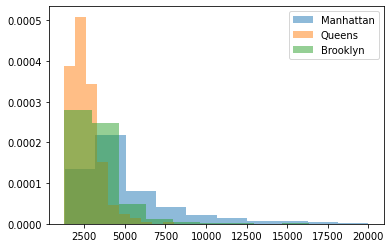

In [13]:
plt.hist(rentals.rent[rentals.borough=='Manhattan'], label='Manhattan', density=True, alpha=.5)
plt.hist(rentals.rent[rentals.borough=='Queens'], label='Queens', density=True, alpha=.5)
plt.hist(rentals.rent[rentals.borough=='Brooklyn'], label='Brooklyn', density=True, alpha=.5)
plt.legend()
plt.show() 

### **Two quantitative variables**

A scatter plot is a great option for investigating the relationship between two quantitative variables. For example, if we want to explore the relationship between rent and size_sqft, we could create a scatter plot of these two variables:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


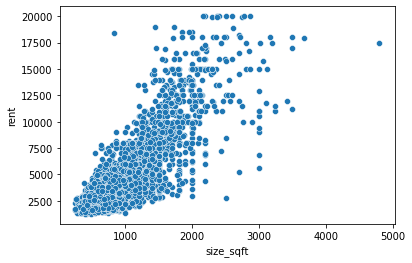

In [14]:
# Create a scatterplot of the size_sqft variable relative to rent
sns.scatterplot(rentals.size_sqft, rentals.rent)
plt.show()

The plot indicates that there is a strong positive linear relationship between the cost to rent a property and its square footage. Larger properties tend to cost more money.



### **Two categorical variables**

Side by side (or stacked) bar plots are useful for visualizing the relationship between two categorical variables. For example, suppose we want to know whether rentals that have an elevator are more likely to have a gym. We could plot a side by side bar plot as follows:

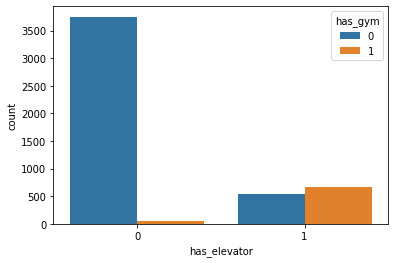

In [15]:
sns.countplot(x='has_elevator', hue='has_gym', data=rentals)
plt.show()

This plot tells us that buildings with elevators are approximately equally likely to have a gym or not have a gym; meanwhile, apartments without elevators are very unlikely to have a gym.

### **Multivariate analysis**

Sometimes, a data analyst is interested in simultaneously exploring the relationship between three or more variables in a single visualization. Many of the visualization methods presented up to this point can include additional variables by using visual cues such as colors, shapes, and patterns. For example, we can investigate the relationship between rental price, square footage, and borough by using color to introduce our third variable:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


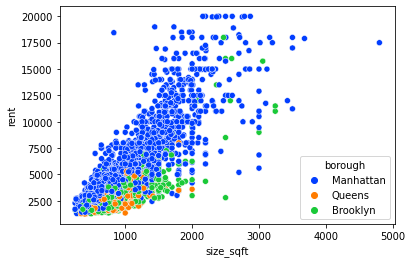

In [16]:
sns.scatterplot(rentals.size_sqft, rentals.rent, hue = rentals.borough, palette='bright')
plt.show()

This plot shows many things at once: the positive linear relationship between price and area, the fact that Manhattan apartments tend to be larger than the other boroughs (because there are more blue points on the right-hand side of the plot compared to the other colors), and that Manhattan apartments tend to cost more money (because the blue points are mostly on top of the green and orange points).

Even though it’s possible to add even more information to this plot (for example, we could use triangles and squares to indicate whether or not an apartment has a gym), it’s not always a good idea to overload a single visualization.

### **Heat-Map Correlation for quantitative Values**

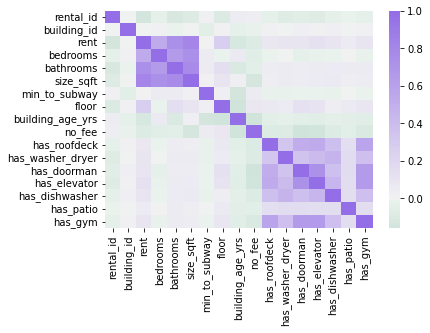

In [17]:
# Define the colormap which maps the data values to the color space defined with the diverging_palette method  
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)

# Create heatmap using the .corr method on df, set colormap to cmap
sns.heatmap(rentals.corr(), center=0, cmap=colors, robust=True)
plt.show()

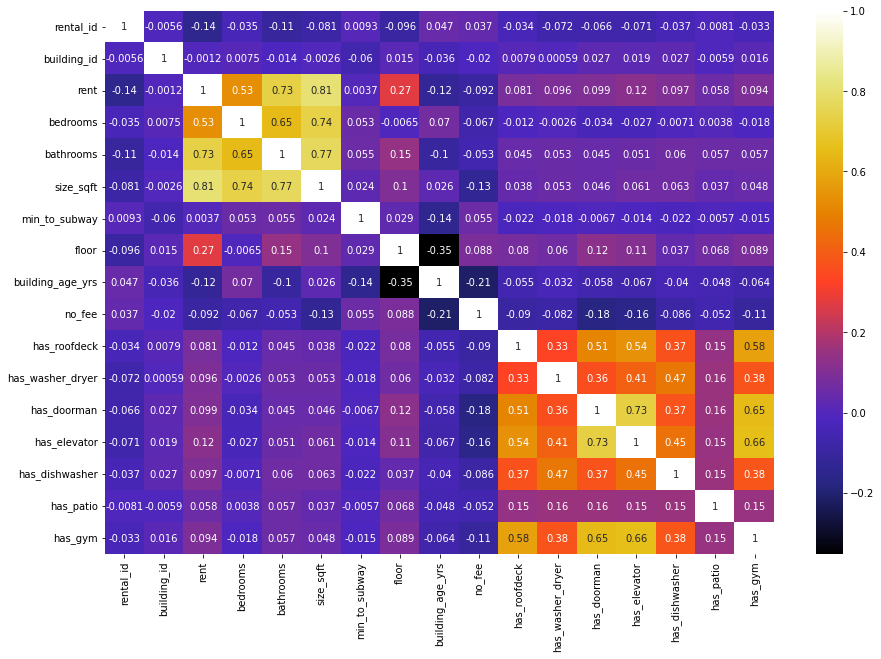

In [18]:
plt.figure(figsize = (15,10))
sns.heatmap(rentals.corr(), cmap="CMRmap", annot=True)
plt.show()

### Some more EDA Techniques

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv("house_dataset.csv")

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
train.shape

(1460, 81)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Editing the Column names

In [25]:
train.rename(columns={
    'Id': 'id',
    'MSSubClass': 'mssubclass',
}, inplace=True)


In [26]:
train.columns = [i.lower() for i in train.columns]

train.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Making a common function for all statistical values

In [27]:
def stat(df): 

    eda_df = {}
    eda_df['null_sum'] = df.isnull().sum()
    eda_df['null_pct'] = df.isnull().mean()
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['median'] = df.median()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()

    return pd.DataFrame(eda_df)


stat(train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

,null_sum,null_pct,dtypes,count,mean,median,min,max
1stflrsf,0,0.000000,int64,1460,1162.626712,1087.0,334,4692
2ndflrsf,0,0.000000,int64,1460,346.992466,0.0,0,2065
3ssnporch,0,0.000000,int64,1460,3.409589,0.0,0,508
alley,1369,0.937671,object,91,NaN,NaN,NaN,NaN
bedroomabvgr,0,0.000000,int64,1460,2.866438,3.0,0,8
...,...,...,...,...,...,...,...,...
utilities,0,0.000000,object,1460,NaN,NaN,AllPub,NoSeWa
wooddecksf,0,0.000000,int64,1460,94.244521,0.0,0,857
yearbuilt,0,0.000000,int64,1460,1971.267808,1973.0,1872,2010
yearremodadd,0,0.000000,int64,1460,1984.865753,1994.0,1950,2010


From the above dataframe, I can see that there are object and integer columns. I want to inspect what all my column types and evaluate if there are any implications for EDA:

In [28]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

Its easy to handle numerical values/coulmns, however out dataset heavily consist of object datatype and we nned to carefully go through them and process them to a state where they can be passed through a model.

### We will look for all the columns with datatype as "OBJECT"

In [29]:
train.select_dtypes(include=['object']).columns


Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')

In [30]:
train.select_dtypes(include=['object']).head()


,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Exploring the Object Columns:

By inspecting the data dictionary provided, I can see that many of these object columns, such as ‘central_air’ and ‘heating_qc’ are categorical or ordinal features that:

1.   can be converted to numeric values through data cleaning, &
2.   are intuitively related to the price of a house — a house with central air would logically have a higher sale price than one without, holding all else constant.


### Relation between features and the Targert using correlation

A key step in our EDA investment is to explore whether there is a relationship between our potential feature columns and our target, the home’s sale price.

For example, using our numeric columns, we can calculate the correlations between potential features and our target, but correlations won’t be calculated for non-numeric columns. This will be addressed further below.

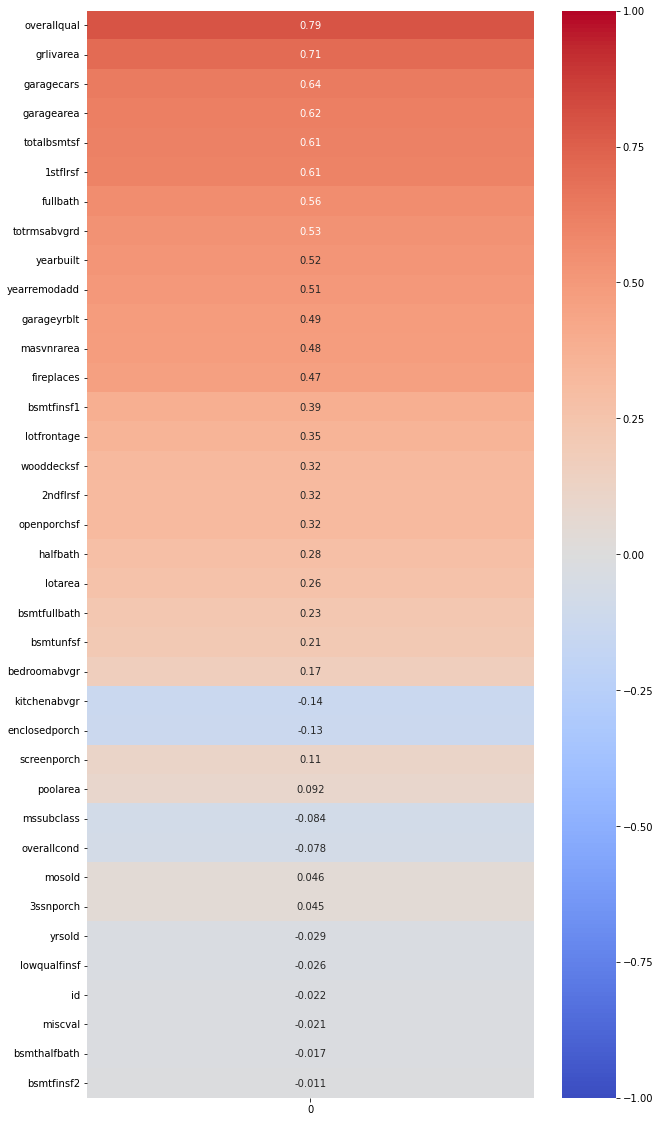

In [31]:
import seaborn as sns
correlations = train.corrwith(train['saleprice']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

Unsurprisingly, features such as the overall quality of the home and the size of the living area have a strong relationship with the sale price.

But what about our non-numeric columns? Ordinal and categorical variables such as ‘exterior condition’ and ‘central air’ intuitively would have a relationship to sale price. It is critical that we visualize this!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


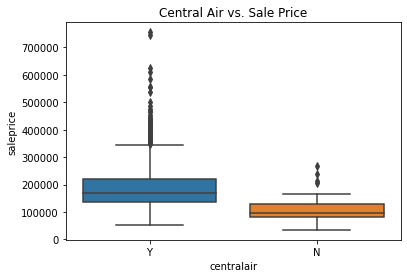

In [32]:
sns.boxplot(train['centralair'], train['saleprice']).set_title('Central Air vs. Sale Price');

Based on this visualization, we will need to convert these columns to represent numeric values when we clean our data before modeling.

We can also use the box plots to look at features that have categorical values. For example, kitchen quality is ranked on a scale from poor to excellent and again we can visualize a relationship to price:

### Kitchen Quality Vs the Price

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


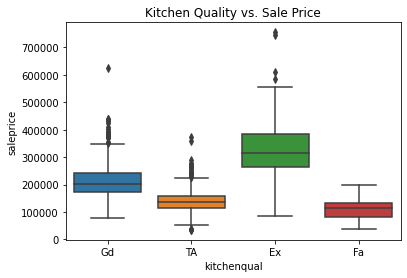

In [33]:
sns.boxplot(train['kitchenqual'], 
            train['saleprice']).set_title('Kitchen Quality vs. Sale Price');

So we want to use the string columns, but how do we clean them?

One option to clean our categorical data is to define a function and apply it to our data such as in the example below to convert the garage quality from its categorical labels to numeric.

First, we want to identify the range of values that a certain feature may contain. Based on the values identified, we can create a function to overwrite each value with numerical values.

In [34]:
## Lets check the Garage Quality column

train['garagequal'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: garagequal, dtype: int64

In [43]:
### One way to do that

def garage_qual_cleaner(cell):
    if cell == 'Ex':
        return 5
    elif cell == 'Gd':
        return 4
    elif cell == 'TA':
        return 3
    elif cell == 'Fa':
        return 2
    elif cell == 'Po':
        return 1
    else:
        return 0

### Alternatively we can use map a dictionary as follows:-

In [36]:
train['kitchenqual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

0       4
1       3
2       4
3       4
4       4
       ..
1455    3
1456    3
1457    4
1458    4
1459    3
Name: kitchenqual, Length: 1460, dtype: int64

This mapping works well when there is an increasing and ordered relationship between the pricing and the Garage Quality.

### But what about variables without a clear, ordered relationship?

For example, the ‘neighborhood’ column contains string values detailing what neighborhood the home is located in. Without knowing the intimate details of the Ames real estate market, it is difficult to assign numeric values to the variable. We can’t simply assign random numbers or number them alphabetically as python will read neighborhood B (if we assign it as ‘2’) as being more valuable than neighborhood A (if we assign it as ‘1’), but less than neighborhood C — but this may not be the actual case and doing so would skew our model! So what do we do?

First, we want to visualize the relationship with our target

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sale Price varies widely by Ames Neighborhood')

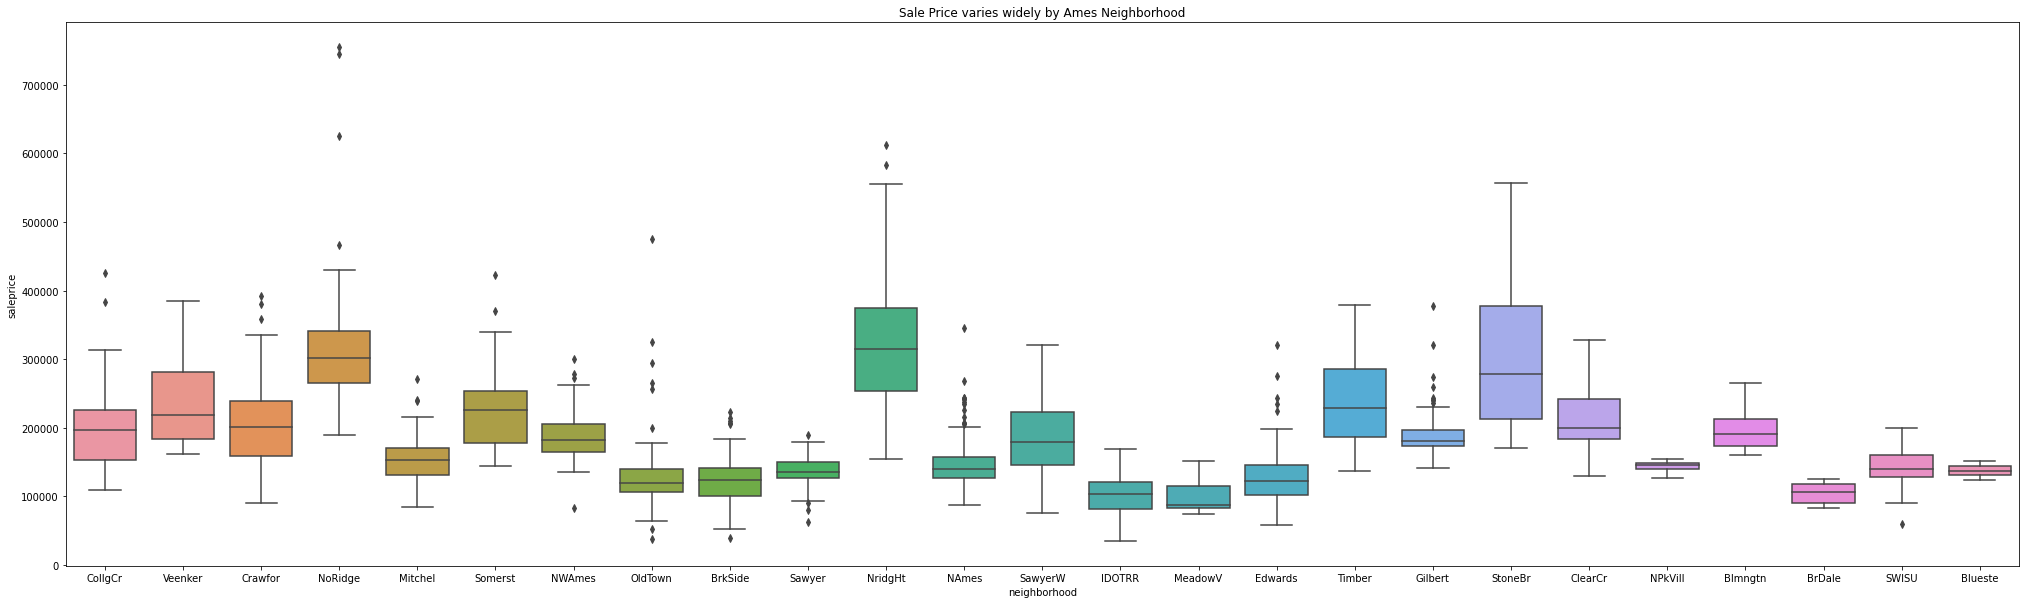

In [37]:
plt.figure(figsize=(35,10)) # adjust the fig size to see everything

sns.boxplot(train['neighborhood'], train['saleprice']).set_title('Sale Price varies widely by Ames Neighborhood')

Some neighborhoods clearly have higher sale prices have than others — a relationship that we want to capture in our model.

With this it is very difficult to manually rank the importance or the possible order of the neighboorhaad and replace them with numbers.

To overcome this issue we use a technique called **One-Hot encoding**

string variables that do not have take on ordinal values such as neighborhood can be converted to a numerical amount by dummifying. Pandas provides a method to get dummify the variables — for each value (in this case neighborhood) a new feature will be created and the row will have a value of 0 or 1 for that column — a 1 signifying that in the original string column, a row contained the value that is now in the column name.

In [38]:
pd.get_dummies(train, columns=['neighborhood'], drop_first= True)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0


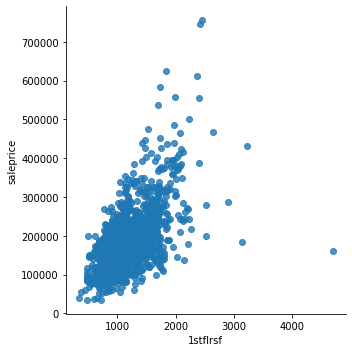

In [39]:
sns.lmplot(x='1stflrsf', y= 'saleprice', data=train, fit_reg=False)

In [40]:
train.loc[train['1stflrsf'] > 3000]

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
496,497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,430000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [47]:
outlier = train.loc[train['1stflrsf'] > 3000].index.values
outlier = list(outlier)
outlier

[]

In [46]:
for row in outlier:
    train.drop(row, inplace=True)